# Which NBA players are the greatest of all time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
season_stats  = pd.read_csv('season_stats.csv')
season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
season_stats.shape

(24691, 53)

In [4]:
players = pd.read_csv('players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
players.shape

(3922, 8)

In [6]:
pd.options.display.max_columns = None
players_stats = pd.merge(season_stats,players, on="Player")
players_stats.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,NaN,0.388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.9,0.6,NaN,NaN,NaN,NaN,NaN,NaN,72.0,232.0,0.310,NaN,NaN,NaN,72.0,232.0,0.310,0.310,58.0,90.0,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
2,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
3,315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,NaN,0.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,0.7,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,51.0,202.0,0.252,NaN,NaN,NaN,51.0,202.0,0.252,0.252,50.0,77.0,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,NaN,0.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,0.8,0.1,0.008,NaN,NaN,NaN,NaN,NaN,48.0,161.0,0.298,NaN,NaN,NaN,48.0,161.0,0.298,0.298,30.0,51.0,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [7]:
players_stats.shape

(24691, 60)

In [8]:
players_stats.columns

Index(['Unnamed: 0_x', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 0_y', 'height',
       'weight', 'collage', 'born', 'birth_city', 'birth_state'],
      dtype='object')

In [9]:
# Organize county facts data with only the desired columns. 
nba_stats = players_stats.reset_index()[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%','2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'height', 'weight', 'collage', 'born' ,'birth_city','birth_state']]

# Create new legible names for the columns.
nba_stats.columns = ['Year', 'Player', 'Position', 'Age', 'Team', 'Games', 'Games_Started', 'Minutes_Played', 'Player_Efficiency_Rating', 'True_Shooting_%', '3_PAr', 'Free_Throw_Rating', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%','2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'Total_Rebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal_Foul', 'Points', 'Height', 'Weight', 'College', 'Birth_Year' ,'Birth_City','Birth_State']

# Check dataset for new county facts.
nba_stats.head()

,Year,Player,Position,Age,Team,Games,Games_Started,Minutes_Played,Player_Efficiency_Rating,True_Shooting_%,3_PAr,Free_Throw_Rating,TRB%,AST%,STL%,BLK%,TOV%,USG%,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Foul,Points,Height,Weight,College,Birth_Year,Birth_City,Birth_State
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,NaN,0.388,NaN,NaN,NaN,NaN,NaN,NaN,72.0,232.0,0.310,NaN,NaN,NaN,72.0,232.0,0.310,0.310,58.0,90.0,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
2,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
3,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,NaN,0.381,NaN,NaN,NaN,NaN,NaN,NaN,51.0,202.0,0.252,NaN,NaN,NaN,51.0,202.0,0.252,0.252,50.0,77.0,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,NaN,0.317,NaN,NaN,NaN,NaN,NaN,NaN,48.0,161.0,0.298,NaN,NaN,NaN,48.0,161.0,0.298,0.298,30.0,51.0,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [10]:
nba_2015 = nba_stats[(nba_stats['Year'] == 2015)]
nba_2015.head()

,Year,Player,Position,Age,Team,Games,Games_Started,Minutes_Played,Player_Efficiency_Rating,True_Shooting_%,3_PAr,Free_Throw_Rating,TRB%,AST%,STL%,BLK%,TOV%,USG%,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Foul,Points,Height,Weight,College,Birth_Year,Birth_City,Birth_State
3809,2015.0,Greg Smith,PF,24.0,DAL,42.0,2.0,363.0,10.2,0.605,0.000,0.796,11.9,3.4,1.0,2.5,14.3,9.5,30.0,49.0,0.612,0.0,0.0,NaN,30.0,49.0,0.612,0.612,20.0,39.0,0.513,26.0,53.0,79.0,9.0,7.0,11.0,11.0,53.0,80.0,196.0,88.0,Western Kentucky University,1947.0,Princeton,Kentucky
5897,2015.0,Mike Dunleavy,SF,34.0,CHI,63.0,63.0,1838.0,11.6,0.573,0.547,0.181,7.3,9.7,1.1,0.8,10.4,14.2,209.0,481.0,0.435,107.0,263.0,0.407,102.0,218.0,0.468,0.546,70.0,87.0,0.805,28.0,220.0,248.0,114.0,39.0,21.0,60.0,123.0,595.0,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York
6185,2015.0,John Lucas,PG,32.0,DET,21.0,0.0,272.0,13.0,0.461,0.279,0.048,3.2,36.0,1.5,0.0,13.1,19.9,42.0,104.0,0.404,9.0,29.0,0.310,33.0,75.0,0.440,0.447,5.0,5.0,1.000,4.0,12.0,16.0,60.0,8.0,0.0,16.0,18.0,98.0,190.0,79.0,University of Maryland,1953.0,Durham,North Carolina
7438,2015.0,Gerald Henderson,SG,27.0,CHO,80.0,72.0,2315.0,13.2,0.514,0.161,0.256,6.5,15.6,1.1,0.7,10.5,20.7,370.0,847.0,0.437,45.0,136.0,0.331,325.0,711.0,0.457,0.463,184.0,217.0,0.848,36.0,237.0,273.0,206.0,51.0,22.0,110.0,135.0,969.0,188.0,79.0,Virginia Commonwealth University,1956.0,Richmond,Virginia
7739,2015.0,Larry Drew,PG,24.0,PHI,12.0,1.0,219.0,4.5,0.388,0.448,0.052,3.7,33.9,1.4,0.0,29.6,16.8,20.0,58.0,0.345,4.0,26.0,0.154,16.0,32.0,0.500,0.379,2.0,3.0,0.667,1.0,14.0,15.0,45.0,6.0,0.0,25.0,13.0,46.0,185.0,77.0,University of Missouri,1958.0,Kansas City,Kansas


In [11]:
nba_2015.shape

(651, 46)

* Outcome variable: Top 10% Points per game

* Categorical variables: Position, Team, Birth State
* Continuous variables: Age, Points, Height, Weight

Univariate

In [12]:
nba_2015['Position'].unique()

array(['PF', 'SF', 'PG', 'SG', 'SG-SF', 'C', 'SF-PF', 'SG-PG', 'SF-SG',
       'PG-SG', 'PF-SF'], dtype=object)

In [13]:
nba_2015['Team'].unique()

array(['DAL', 'CHI', 'DET', 'CHO', 'PHI', 'SAS', 'NYK', 'WAS', 'TOT',
       'MIN', 'BRK', 'LAL', 'MEM', 'ATL', 'CLE', 'SAC', 'HOU', 'LAC',
       'MIL', 'MIA', 'BOS', 'NOP', 'GSW', 'POR', 'ORL', 'OKC', 'IND',
       'DEN', 'PHO', 'TOR', 'UTA'], dtype=object)

In [14]:
nba_2015['Birth_State'].unique()

array(['Kentucky', 'New York', 'North Carolina', 'Virginia', 'Kansas',
       'Maryland', 'Illinois', 'Arkansas', 'Indiana', 'South Carolina',
       'Pennsylvania', 'U.S. Virgin Islands', 'Florida', 'Germany',
       'California', 'Michigan', 'Washington', 'South Dakota', 'Turkey',
       'Haiti', 'Spain', 'Mississippi', 'Russia', 'Belgium', 'Alabama',
       'Wisconsin', 'Argentina', 'Brazil', 'Rhode Island', 'Texas',
       'France', 'Iowa', 'Ohio', nan, 'Georgia', 'Idaho', 'New Jersey',
       'New Hampshire', 'South Sudan', 'United Kingdom', 'Minnesota',
       'Slovenia', 'Louisiana', 'Australia', 'Dominican Republic',
       'Martinique', 'West Virginia', 'Italy', 'Switzerland', 'Canada',
       'Tennessee', 'District of Columbia', 'Poland', 'Arizona', 'Alaska',
       'Missouri', 'Israel', 'Republic of the Congo', 'Sweden', 'Wyoming',
       'Massachusetts', 'Oklahoma', 'Montenegro', 'French Guiana',
       'Venezuela', 'Democratic Republic of the Congo', 'Jamaica',
       'New

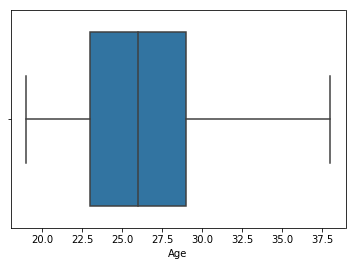

In [15]:
sns.boxplot(nba_2015['Age']);
plt.show()

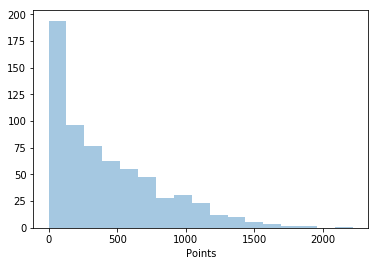

In [16]:
sns.distplot(nba_2015["Points"], kde=False);
plt.show()

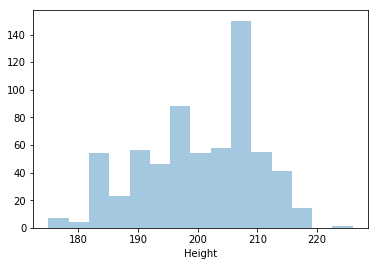

In [17]:
sns.distplot(nba_2015["Height"], kde=False);
plt.show()

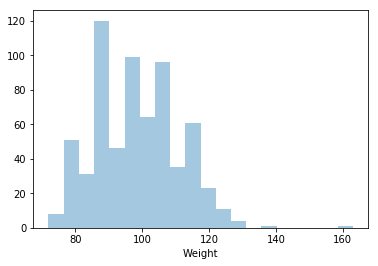

In [18]:
sns.distplot(nba_2015["Weight"], kde=False);
plt.show()

Bivariate

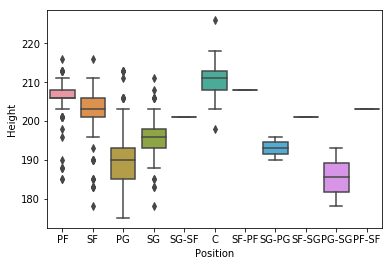

In [19]:
sns.boxplot(y=nba_2015['Height'], x=nba_2015['Position']);
plt.show()

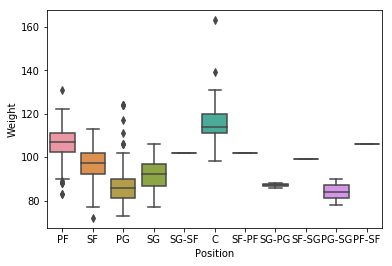

In [20]:
sns.boxplot(y=nba_2015['Weight'], x=nba_2015['Position']);
plt.show()

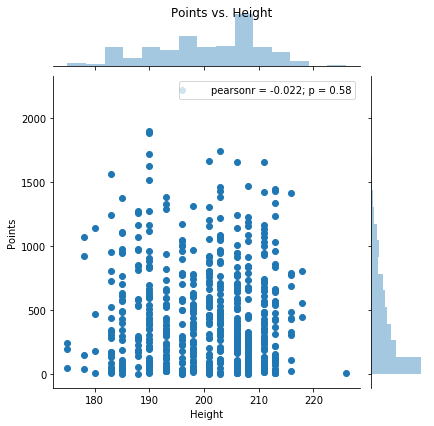

In [21]:
bx = sns.jointplot(x="Height", y="Points", data=nba_2015) 
bx.fig.suptitle("Points vs. Height")
plt.show()

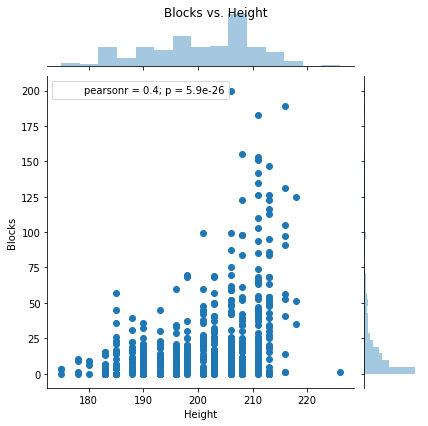

In [22]:
bx = sns.jointplot(x="Height", y="Blocks", data=nba_2015) 
bx.fig.suptitle("Blocks vs. Height")
plt.show()

In [23]:
nba_2015['Points Per Game'] = nba_2015['Points']/nba_2015['Games']

C:\Users\Andrew Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
nba_2015_shortened = nba_2015.reset_index()[['Age', 'Games', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers','Points','Height', 'Weight']]

In [25]:
nba_2015_corr = nba_2015_shortened.corr()
print(nba_2015_corr)

                     Age     Games  Total_Rebounds   Assists    Steals  \
Age             1.000000  0.126081        0.059977  0.085702  0.017170   
Games           0.126081  1.000000        0.725774  0.572120  0.722101   
Total_Rebounds  0.059977  0.725774        1.000000  0.399331  0.600137   
Assists         0.085702  0.572120        0.399331  1.000000  0.776132   
Steals          0.017170  0.722101        0.600137  0.776132  1.000000   
Blocks         -0.010374  0.509433        0.800298  0.169101  0.375331   
Turnovers       0.041034  0.726287        0.666609  0.872668  0.838630   
Points          0.060329  0.764227        0.732272  0.743381  0.826360   
Height          0.055299  0.068614        0.316504 -0.281750 -0.134540   
Weight          0.093796  0.102962        0.362183 -0.217892 -0.104087   

                  Blocks  Turnovers    Points    Height    Weight  
Age            -0.010374   0.041034  0.060329  0.055299  0.093796  
Games           0.509433   0.726287  0.764227  0.

In [26]:
f, ax = plt.subplots(figsize=(12, 9))

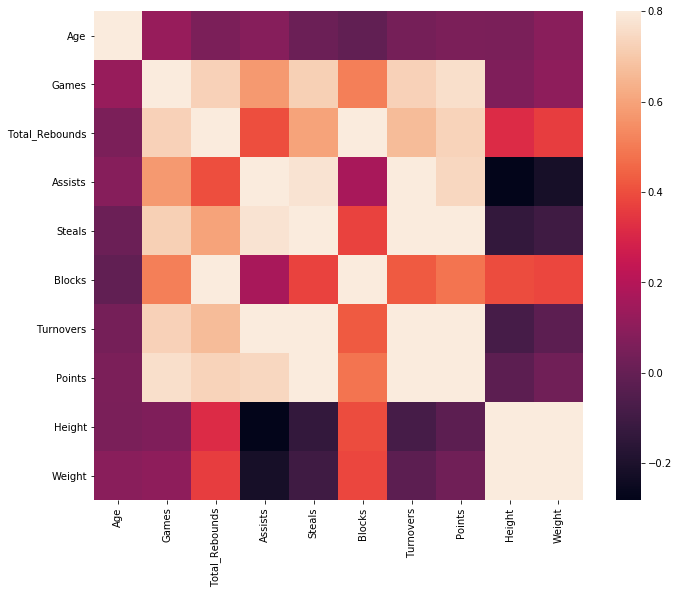

In [27]:
sns.heatmap(nba_2015_corr, vmax=.8, square=True)
plt.show()

                     Age     Games  Total_Rebounds   Assists    Steals  \
Age             1.000000  0.126081        0.059977  0.085702  0.017170   
Games           0.126081  1.000000        0.725774  0.572120  0.722101   
Total_Rebounds  0.059977  0.725774        1.000000  0.399331  0.600137   
Assists         0.085702  0.572120        0.399331  1.000000  0.776132   
Steals          0.017170  0.722101        0.600137  0.776132  1.000000   
Blocks         -0.010374  0.509433        0.800298  0.169101  0.375331   
Turnovers       0.041034  0.726287        0.666609  0.872668  0.838630   
Points          0.060329  0.764227        0.732272  0.743381  0.826360   
Height          0.055299  0.068614        0.316504 -0.281750 -0.134540   
Weight          0.093796  0.102962        0.362183 -0.217892 -0.104087   

                  Blocks  Turnovers    Points    Height    Weight  
Age            -0.010374   0.041034  0.060329  0.055299  0.093796  
Games           0.509433   0.726287  0.764227  0.

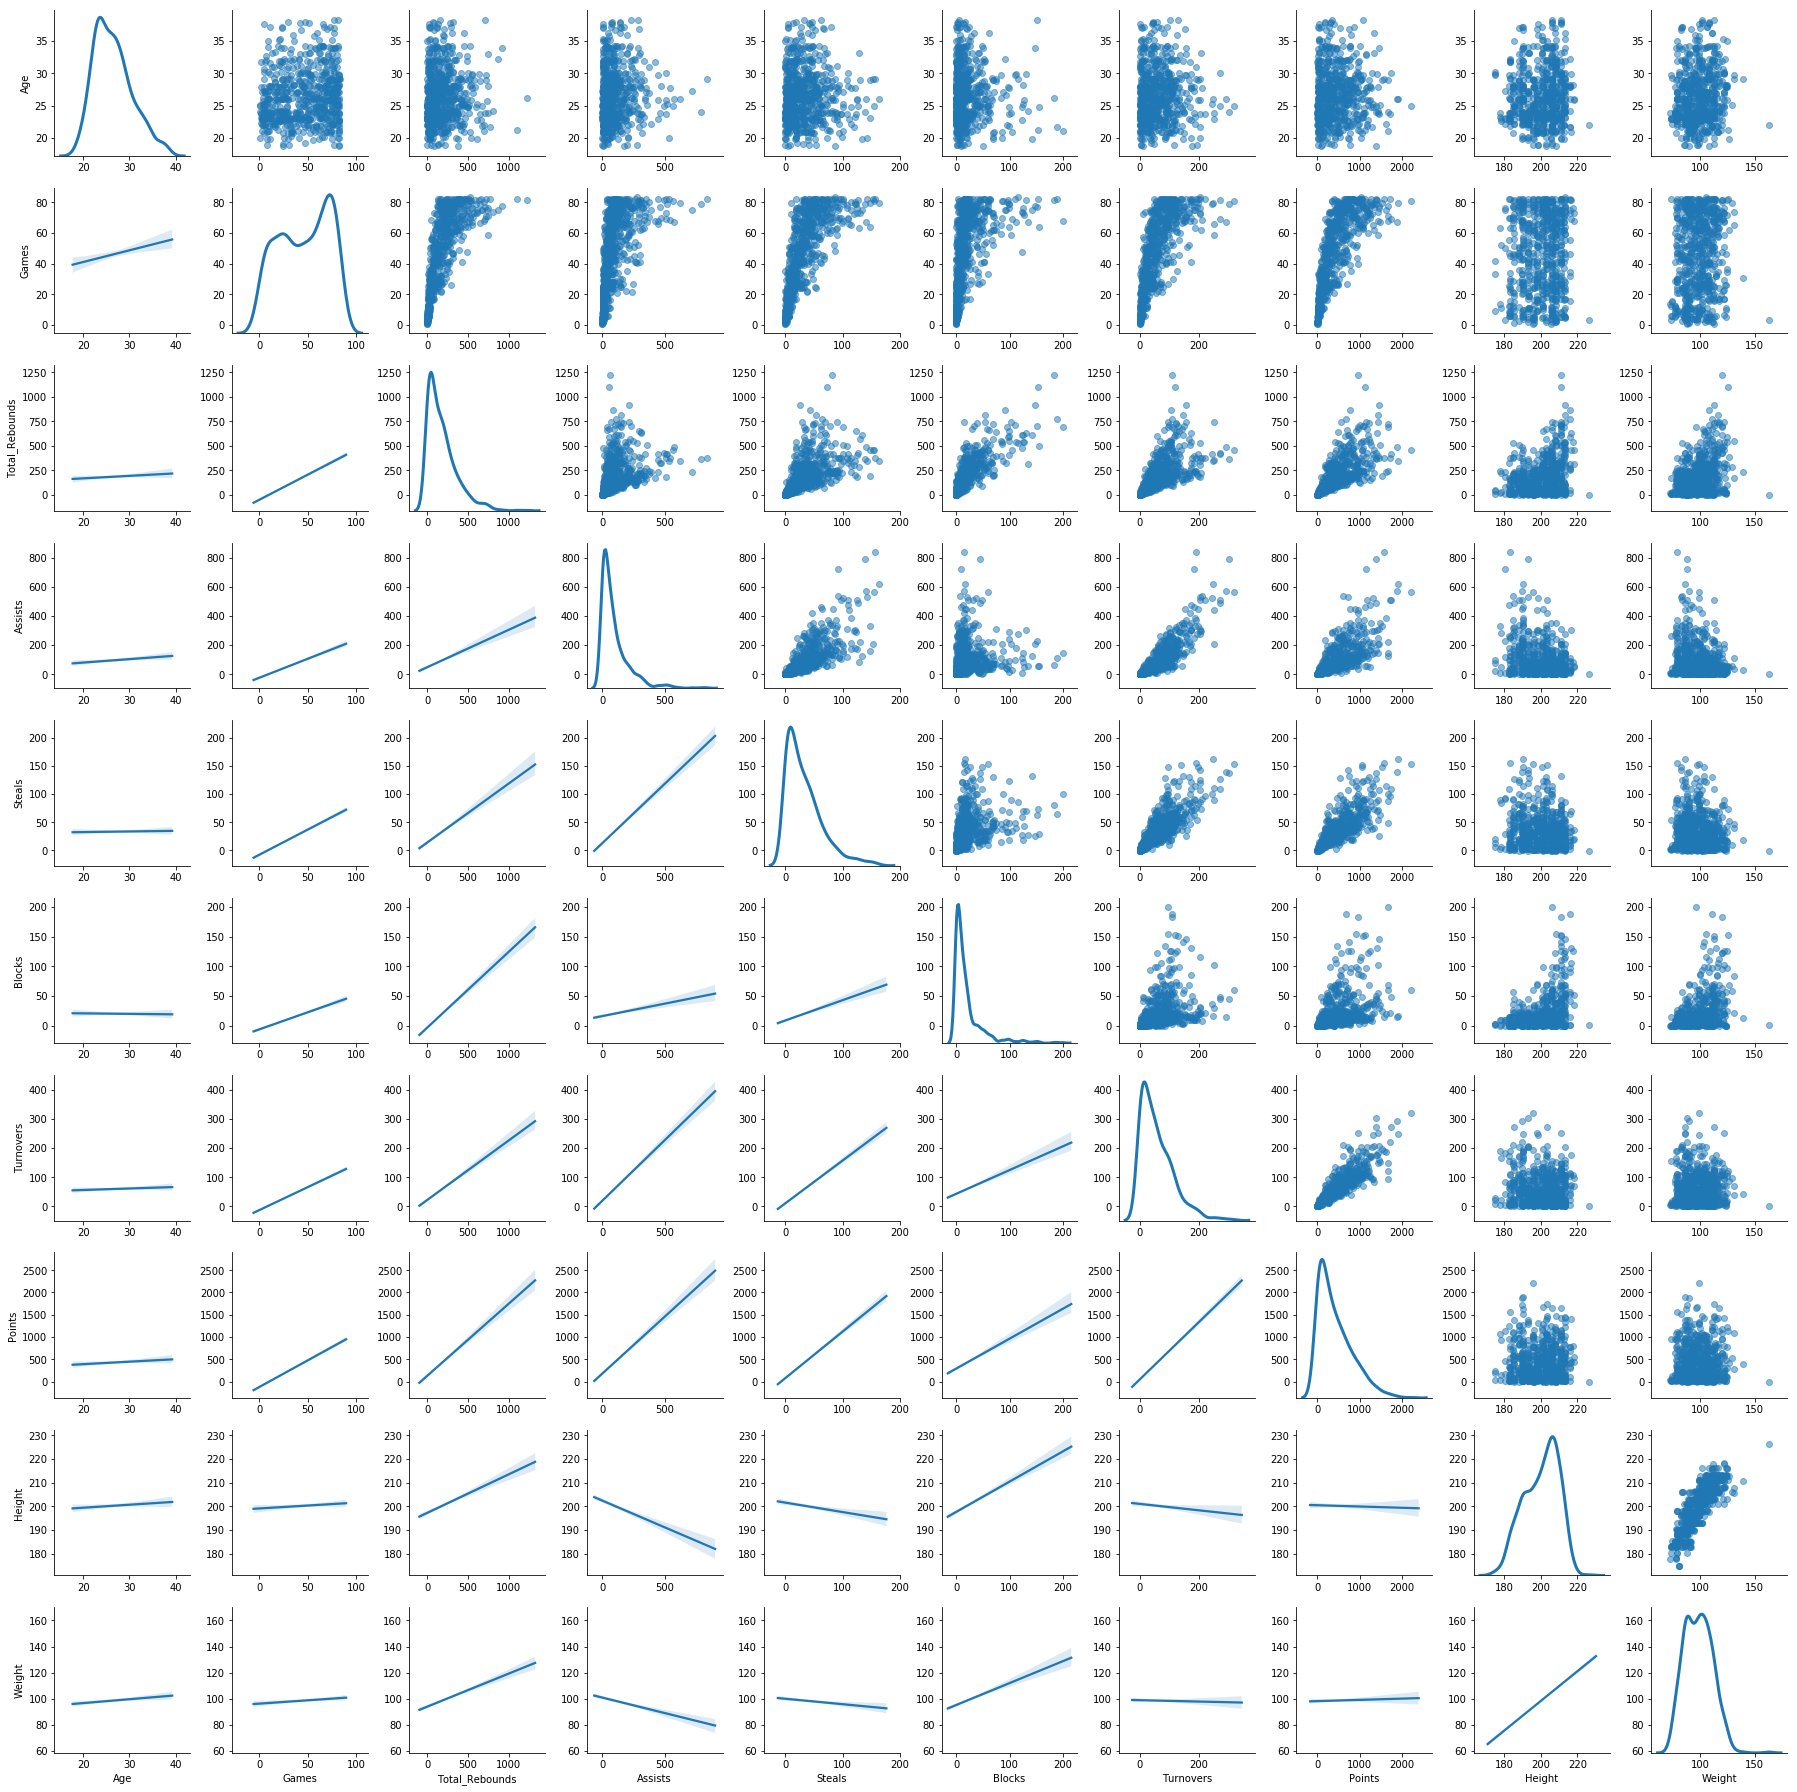

In [28]:
nba_2015_corr = nba_2015_shortened.corr()
print(nba_2015_corr)

df_jittered = nba_2015_shortened.dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [29]:
nba_2015 = nba_2015[['Player','Age', 'Games', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers','Points','Height', 'Weight', 'Points Per Game']].sort_values('Points Per Game', ascending=False).head(65)

In [30]:
nba_2015

,Player,Age,Games,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Points,Height,Weight,Points Per Game
22414,Russell Westbrook,26.0,67.0,488.0,574.0,140.0,14.0,293.0,1886.0,190.0,90.0,28.149254
22636,James Harden,25.0,81.0,459.0,565.0,154.0,60.0,321.0,2217.0,196.0,99.0,27.370370
21672,Kevin Durant,26.0,27.0,178.0,110.0,24.0,25.0,74.0,686.0,206.0,108.0,25.407407
19682,LeBron James,30.0,69.0,416.0,511.0,109.0,49.0,272.0,1743.0,203.0,113.0,25.260870
23660,Anthony Davis,21.0,68.0,696.0,149.0,100.0,200.0,95.0,1656.0,206.0,97.0,24.352941
19375,Carmelo Anthony,30.0,40.0,264.0,122.0,40.0,17.0,89.0,966.0,203.0,108.0,24.150000
22931,DeMarcus Cousins,24.0,59.0,747.0,210.0,90.0,103.0,254.0,1421.0,211.0,122.0,24.084746
22525,Stephen Curry,26.0,80.0,341.0,619.0,163.0,16.0,249.0,1900.0,190.0,86.0,23.750000
21065,LaMarcus Aldridge,29.0,71.0,726.0,124.0,48.0,68.0,122.0,1661.0,211.0,117.0,23.394366
15671,Kobe Bryant,36.0,35.0,199.0,197.0,47.0,7.0,128.0,782.0,198.0,96.0,22.342857
